In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
#matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

In [2]:
from dmba import regressionSummary

In [3]:
df = pd.read_csv('bengaluru_data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
bhp_df = df.copy()

In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df['location'].value_counts()

Whitefield            540
Sarjapur  Road        399
Electronic City       302
Kanakpura Road        273
Thanisandra           234
                     ... 
Abshot Layout           1
Vijaypura               1
Gopal Reddy Layout      1
Zuzuvadi                1
Prakash Nagar           1
Name: location, Length: 1305, dtype: int64

In [9]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Suleyli     1
Doissa      1
Salle F     1
Kierser     1
Sohid O     1
Name: society, Length: 2688, dtype: int64

In [12]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [13]:
pd.set_option("display.max_rows", 15000)

In [14]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [15]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [16]:
df2 = df.drop(['area_type','availability','society','balcony'],axis=1)

In [17]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [18]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [19]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))

<ipython-input-20-36ad405a56a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [21]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [22]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [23]:
df3['bhk'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
14       1
43       1
18       1
12       1
13       1
16       1
19       1
Name: bhk, dtype: int64

In [24]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [28]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
convert_sqft_to_num('256sq.tf')

In [30]:
df3.loc[1]['total_sqft']

'2600'

In [31]:
df3.shape

(13246, 6)

In [32]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [33]:
df4.shape

(13200, 6)

In [34]:
df4.loc[188]

location      KR Puram
size             2 BHK
total_sqft      1277.5
bath                 2
price             56.8
bhk                  2
Name: 188, dtype: object

In [35]:
ex_df3 = df3.copy()

In [36]:
ex_df4 = ex_df3[~ex_df3['total_sqft'].apply(is_float)]

In [37]:
ex_df4.head(13)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [38]:
ex_df4.head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


### ------------------------------------------------------------------------------------------------------------------------------------------------------------


#### Feature Engg

In [39]:
df5 = df4.copy()

In [40]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [41]:
df5['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [42]:
df5['location'].nunique()

1298

In [43]:
len(df5['location'].unique())

1298

In [44]:
df5['location'].value_counts()

Whitefield                                            532
Sarjapur  Road                                        392
Electronic City                                       302
Kanakpura Road                                        264
Thanisandra                                           232
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     151
Hennur Road                                           150
7th Phase JP Nagar                                    148
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bellandur     

In [45]:
df5['location']

0                                 Electronic City Phase II
1                                         Chikka Tirupathi
2                                              Uttarahalli
3                                       Lingadheeranahalli
4                                                 Kothanur
5                                               Whitefield
6                                         Old Airport Road
7                                             Rajaji Nagar
8                                             Marathahalli
9                                             Gandhi Bazar
10                                              Whitefield
11                                              Whitefield
12                                      7th Phase JP Nagar
13                                               Gottigere
14                                                Sarjapur
15                                             Mysore Road
16                                           Bisuvanahal

In [46]:
df5.location = df5.location.apply(lambda x: x.strip())

In [47]:
df5['location']

0                                 Electronic City Phase II
1                                         Chikka Tirupathi
2                                              Uttarahalli
3                                       Lingadheeranahalli
4                                                 Kothanur
5                                               Whitefield
6                                         Old Airport Road
7                                             Rajaji Nagar
8                                             Marathahalli
9                                             Gandhi Bazar
10                                              Whitefield
11                                              Whitefield
12                                      7th Phase JP Nagar
13                                               Gottigere
14                                                Sarjapur
15                                             Mysore Road
16                                           Bisuvanahal

In [48]:
df5.location.nunique()

1287

In [49]:
location_stats = df5['location'].value_counts(ascending=False)

In [50]:
location_stats

Whitefield                                            533
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        264
Thanisandra                                           235
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     151
Hennur Road                                           150
7th Phase JP Nagar                                    148
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bellandur     

In [51]:
location_stats.values.sum()

13200

In [52]:
len(location_stats[location_stats>10])

240

In [53]:
location_stats[location_stats>10]

Whitefield                     533
Sarjapur  Road                 392
Electronic City                304
Kanakpura Road                 264
Thanisandra                    235
Yelahanka                      210
Uttarahalli                    186
Hebbal                         176
Marathahalli                   175
Raja Rajeshwari Nagar          171
Bannerghatta Road              151
Hennur Road                    150
7th Phase JP Nagar             148
Haralur Road                   141
Electronic City Phase II       131
Rajaji Nagar                   106
Chandapura                      98
Bellandur                       96
Hoodi                           88
KR Puram                        88
Electronics City Phase 1        87
Yeshwanthpur                    85
Begur Road                      84
Sarjapur                        80
Harlur                          79
Kasavanhalli                    79
Banashankari                    74
Hormavu                         74
Kengeri             

In [54]:
location_stats.count()

1287

In [55]:
len(location_stats[location_stats<=10])

1047

### Dimensionality Reduction

##### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns


In [56]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Ganga Nagar                                           10
Nagadevanahalli                                       10
Thyagaraja Nagar                                      10
Nagappa Reddy Layout                                  10
1st Block Koramangala                                 10
Kalkere                                               10
Gunjur Palya                                          10
Sadashiva Nagar                                       10
Sector 1 HSR Layout                                   10
Dodsworth Layout                                      10
Basapura                                              10
BTM 1st Stage                                         10
Dairy Circle                                          10
Naganathapura                                         10
Richmond Town                                          9
Jakkur Plantation                                      9
Kaverappa Layout                                       9
Gollahalli                     

In [57]:
len(df5.location.unique())

1287

In [58]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [59]:
df5.head(15)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804



### Outlier Removal Using Business Logic

#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [60]:
df5[df5['total_sqft']/df5['bhk']<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [61]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

### Outlier Removal Using Standard Deviation and Mean

In [62]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

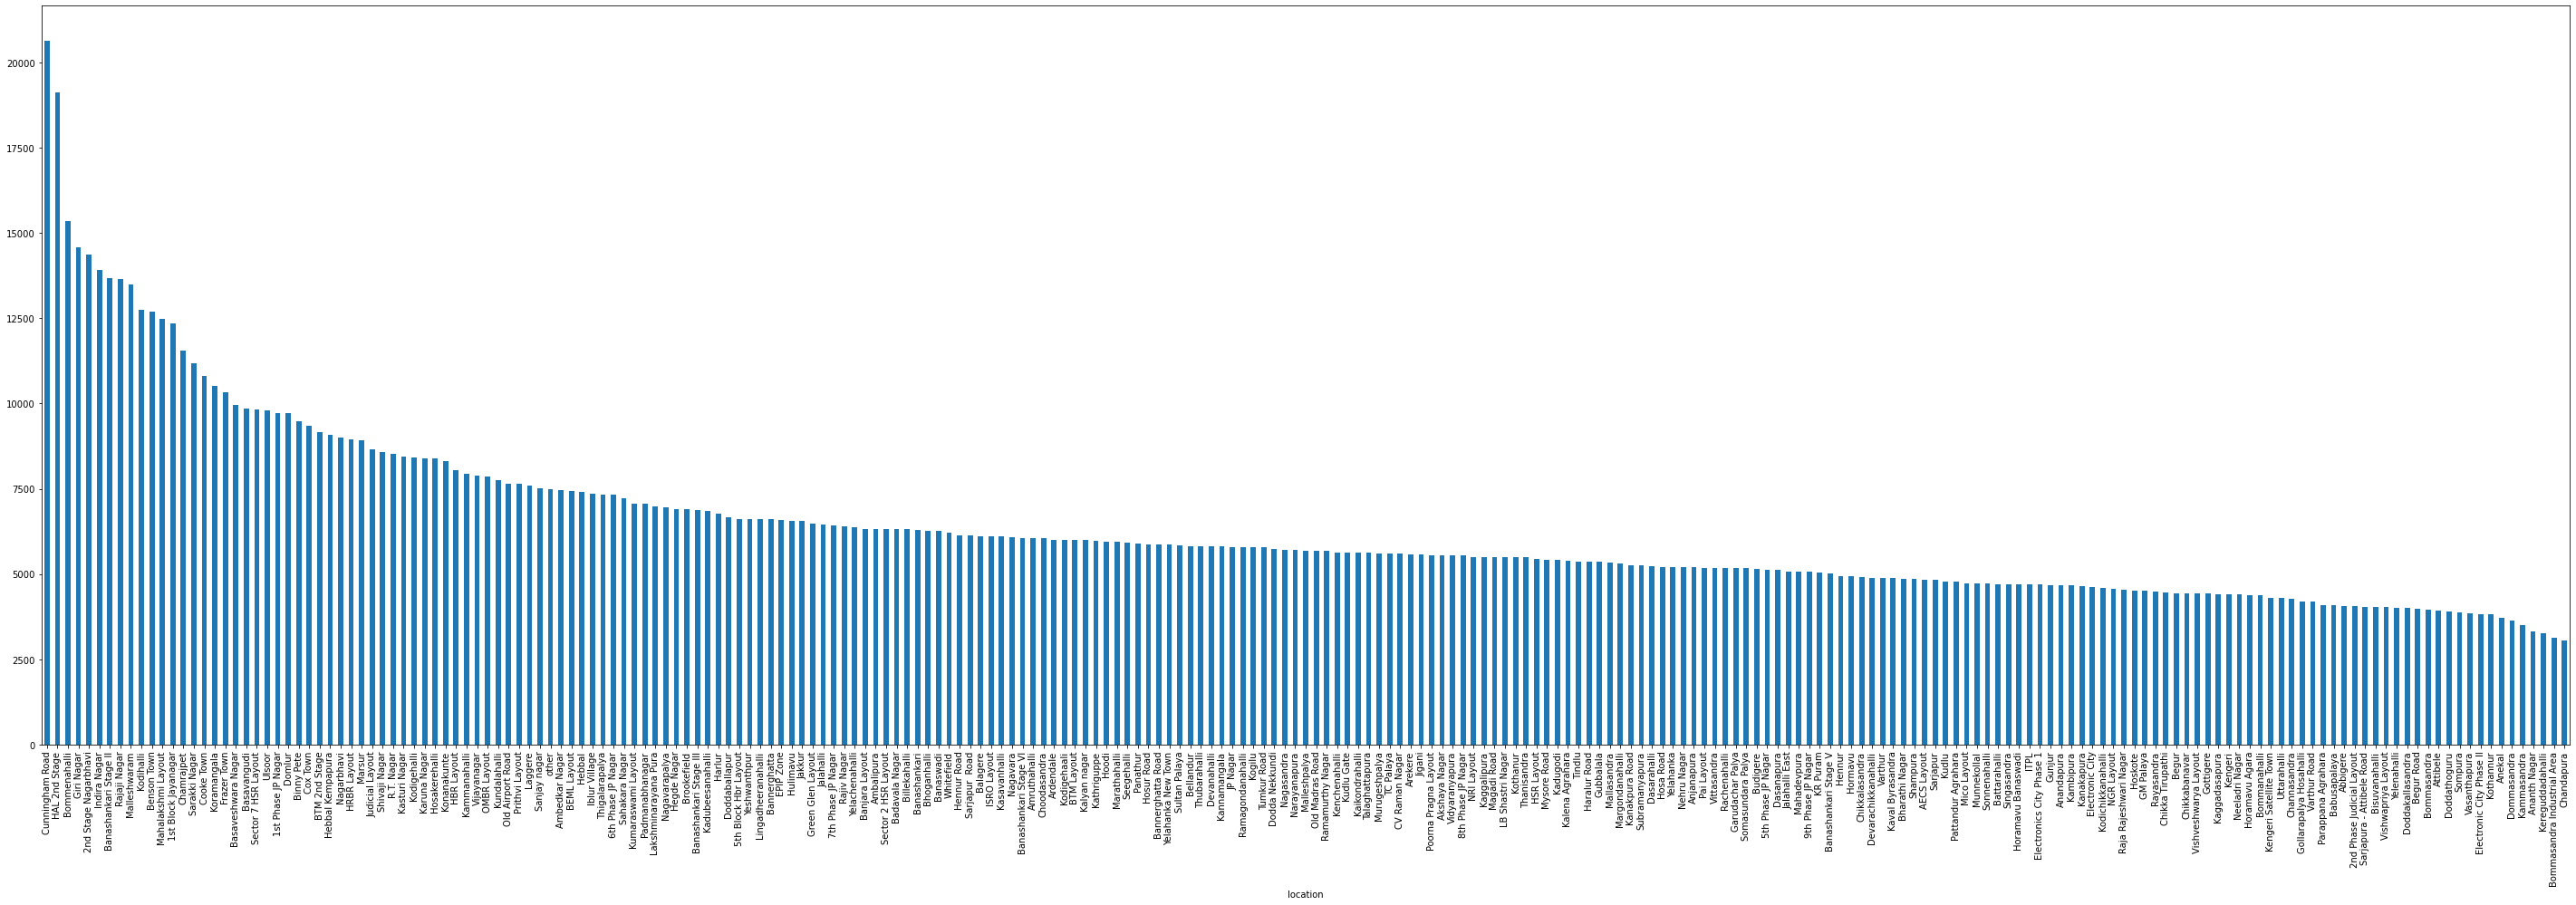

In [63]:
df6.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(50,15))

In [64]:
df6.groupby('location')

In [65]:
for key,sdf in df6.groupby('location'):
    print(key)
    print('+'*100)
    print(sdf['price'].mean())
    print('*'*50)

1st Block Jayanagar
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
254.1
**************************************************
1st Phase JP Nagar
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
172.3695652173913
**************************************************
2nd Phase Judicial Layout
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
46.18181818181818
**************************************************
2nd Stage Nagarbhavi
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
270.1111111111111
**************************************************
5th Block Hbr Layout
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
125.42857142857143
**************************************************
5th Phase JP Nagar
+++++++++++++++++++++++++++++++++++

220.4
**************************************************
Indira Nagar
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
288.7906976744186
**************************************************
JP Nagar
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
105.52679687499999
**************************************************
Jakkur
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
132.20492647058822
**************************************************
Jalahalli
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
94.20295918367346
**************************************************
Jalahalli East
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
55.21333333333334
**************************************************
Jigani
++++++++++++++++++++++++++++++

Parappana Agrahara
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
48.5625
**************************************************
Pattandur Agrahara
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
60.51363636363636
**************************************************
Poorna Pragna Layout
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
80.78699999999999
**************************************************
Prithvi Layout
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
144.96153846153845
**************************************************
R.T. Nagar
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
134.40625
**************************************************
Rachenahalli
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [66]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [67]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

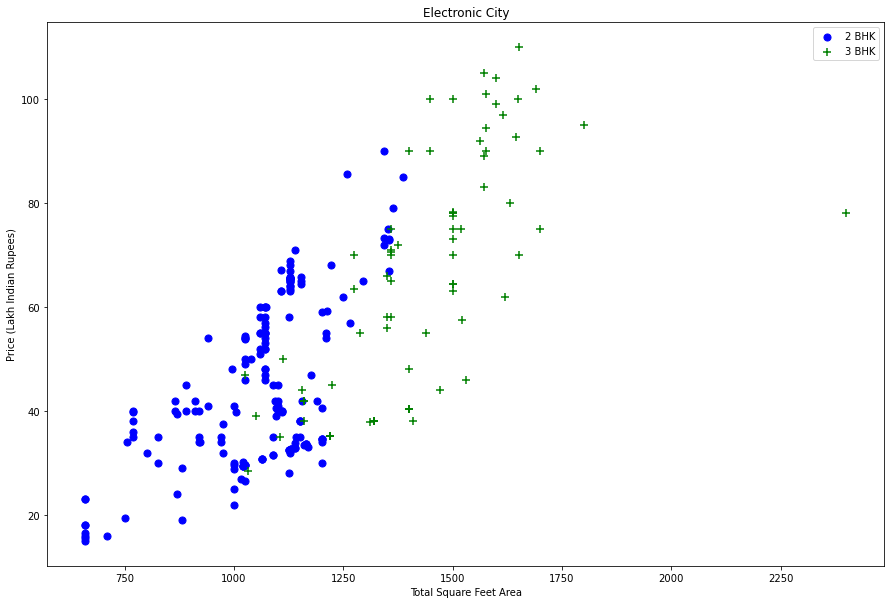

In [68]:
plot_scatter_chart(df7,'Electronic City')

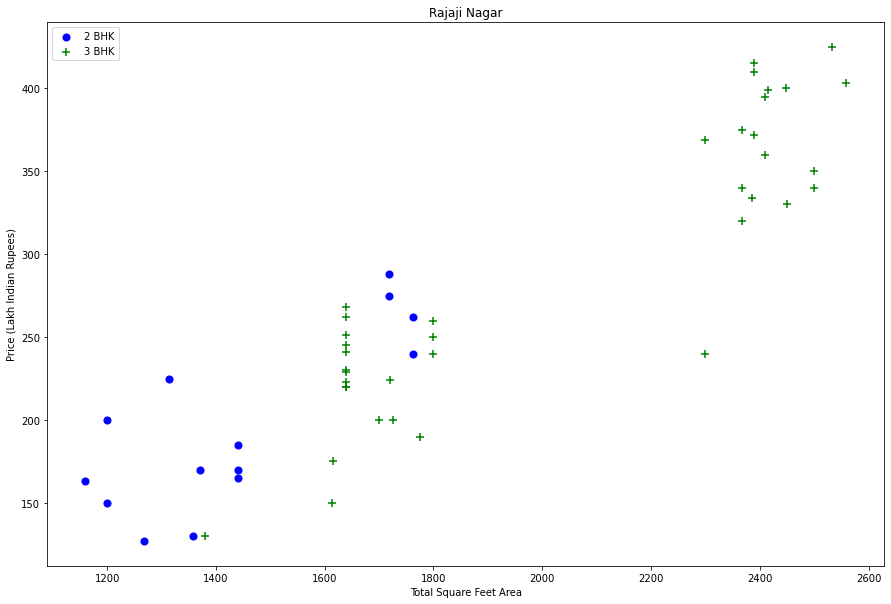

In [69]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [70]:
 for location, location_df in df7.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = { 
                'mean': np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            print(stats)

None
{'mean': 11983.805668016194, 'std': 0.0, 'count': 1}
{'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}
None
{'mean': 5952.380952380952, 'std': 0.0, 'count': 1}
{'mean': 7931.806799837383, 'std': 1534.1422783514054, 'count': 8}
{'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}
{'mean': 7537.92218148637, 'std': 1607.0591069513537, 'count': 3}
None
{'mean': 3851.8518518518517, 'std': 497.593660834978, 'count': 3}
None
None
None
{'mean': 4755.410708222867, 'std': 374.06419031565235, 'count': 3}
None
{'mean': 3611.1111111111113, 'std': 0.0, 'count': 1}
None
{'mean': 4628.623188405797, 'std': 371.376811594203, 'count': 2}
{'mean': 5067.359785883266, 'std': 453.24956183513086, 'count': 17}
None
None
{'mean': 5932.976565810136, 'std': 671.9347030151997, 'count': 8}
{'mean': 8403.2863080867, 'std': 1515.4146231166221, 'count': 5}
None
{'mean': 6133.333333333334, 'std': 133.33333333333348, 'count': 2}
{'mean': 6272.516842644272, 'std': 1012.7881476778178, 'co

None
{'mean': 4782.163531612381, 'std': 528.754856051744, 'count': 12}
{'mean': 4993.1936034011, 'std': 599.6867241072546, 'count': 10}
None
{'mean': 9450.335685771604, 'std': 1592.310446826406, 'count': 3}
{'mean': 11852.598087462115, 'std': 1661.385526814624, 'count': 4}
None
{'mean': 8230.365020192607, 'std': 2084.870283562963, 'count': 5}
None
{'mean': 19562.04239043375, 'std': 1371.647354515775, 'count': 8}
None
{'mean': 5790.960451977401, 'std': 0.0, 'count': 1}
{'mean': 5113.831187981814, 'std': 479.0067310357899, 'count': 7}
None
{'mean': 5117.938928017428, 'std': 689.5131286166418, 'count': 6}
None
{'mean': 4559.695263559465, 'std': 476.6579147263085, 'count': 6}
{'mean': 4952.787098845229, 'std': 492.9480389583671, 'count': 13}
None
None
{'mean': 3902.439024390244, 'std': 0.0, 'count': 1}
{'mean': 4326.739586439992, 'std': 1082.6324000628515, 'count': 9}
None
{'mean': 4271.409551033765, 'std': 572.5384233681566, 'count': 19}
None
None
{'mean': 6861.368629625442, 'std': 792.38

{'mean': 6896.551724137931, 'std': 0.0, 'count': 1}
None
{'mean': 2916.3934426229507, 'std': 116.39344262295072, 'count': 2}
{'mean': 3227.8474191127148, 'std': 607.9293263487696, 'count': 15}
None
{'mean': 5096.602546756389, 'std': 417.85606461579323, 'count': 5}
{'mean': 4604.465395835363, 'std': 480.2703857860582, 'count': 11}
{'mean': 4969.70888132023, 'std': 588.0621061875769, 'count': 10}
None
{'mean': 5119.046144238704, 'std': 440.4864827192896, 'count': 20}
{'mean': 5076.61097773778, 'std': 519.9588688689665, 'count': 71}
{'mean': 4882.675818502869, 'std': 566.9559827376457, 'count': 96}
None
{'mean': 5781.957506095438, 'std': 175.0239571773057, 'count': 6}
{'mean': 6165.072841663136, 'std': 431.9125650497451, 'count': 3}
None
{'mean': 6149.479659413434, 'std': 0.0, 'count': 1}
None
{'mean': 5690.909090909091, 'std': 0.0, 'count': 1}
{'mean': 5584.57638412496, 'std': 830.9704121531988, 'count': 30}
{'mean': 5761.689498642713, 'std': 998.0178355092115, 'count': 32}
None
{'mean':

None
{'mean': 4339.6530666138515, 'std': 543.1788208229217, 'count': 5}
{'mean': 4119.938962696688, 'std': 797.0186502026783, 'count': 100}
None
None
{'mean': 4930.857487922706, 'std': 1211.8785162729496, 'count': 3}
None
{'mean': 11363.636363636364, 'std': 0.0, 'count': 1}
{'mean': 13550.152331961022, 'std': 2381.326440584, 'count': 14}
{'mean': 14106.804544911796, 'std': 2072.9910392276593, 'count': 38}
{'mean': 14262.84451531597, 'std': 2931.157676887876, 'count': 12}
{'mean': 13757.502632502632, 'std': 2306.3948735573995, 'count': 4}
None
{'mean': 6830.924551419025, 'std': 533.7908722073457, 'count': 3}
{'mean': 7396.449704142012, 'std': 0.0, 'count': 1}
None
{'mean': 5555.555555555556, 'std': 0.0, 'count': 1}
{'mean': 4606.370427585701, 'std': 1235.7180227997476, 'count': 22}
{'mean': 5708.567918939573, 'std': 1498.853091063744, 'count': 23}
None
{'mean': 6956.790123456791, 'std': 336.85836171956186, 'count': 3}
{'mean': 4839.4046288157915, 'std': 1129.149258888949, 'count': 31}
{

In [71]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [72]:
df8 = remove_bhk_outliers(df7)

In [73]:
df8.shape

(7317, 7)

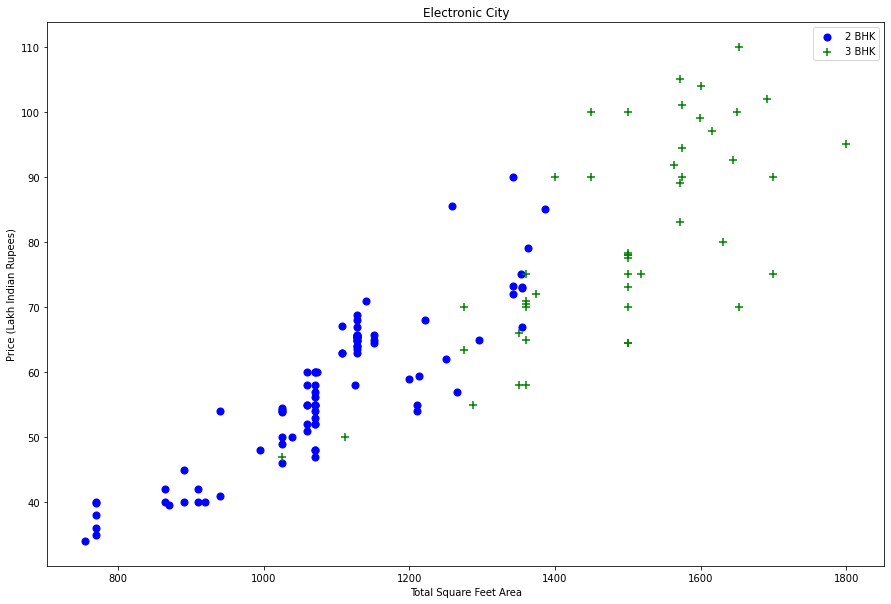

In [74]:
plot_scatter_chart(df8,'Electronic City')

Text(0, 0.5, 'Count')

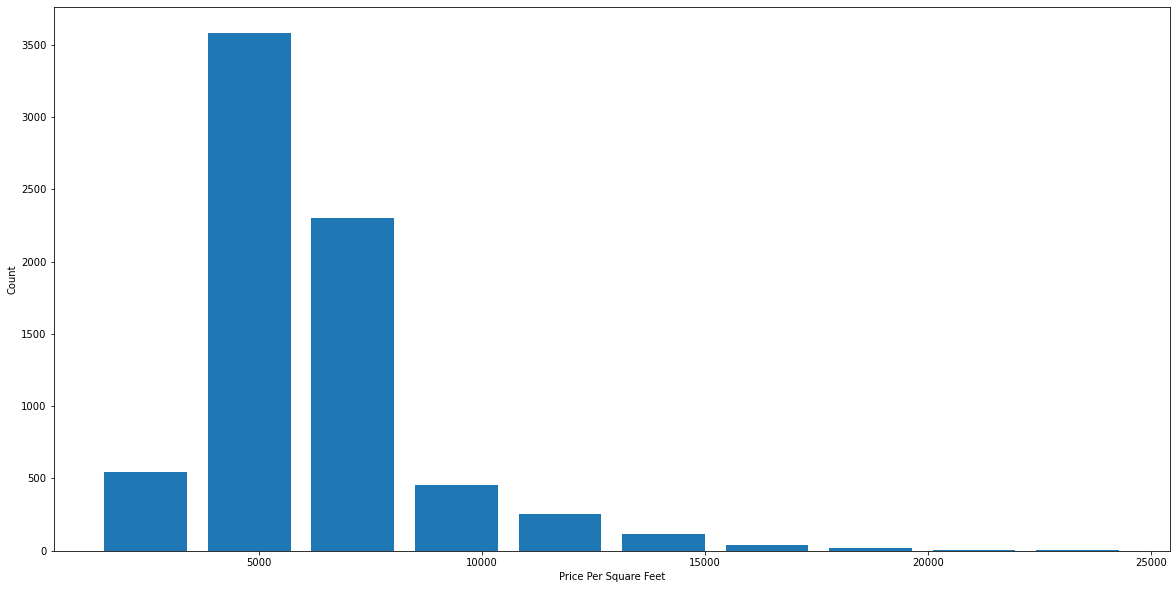

In [75]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Bathroom Feature

In [76]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

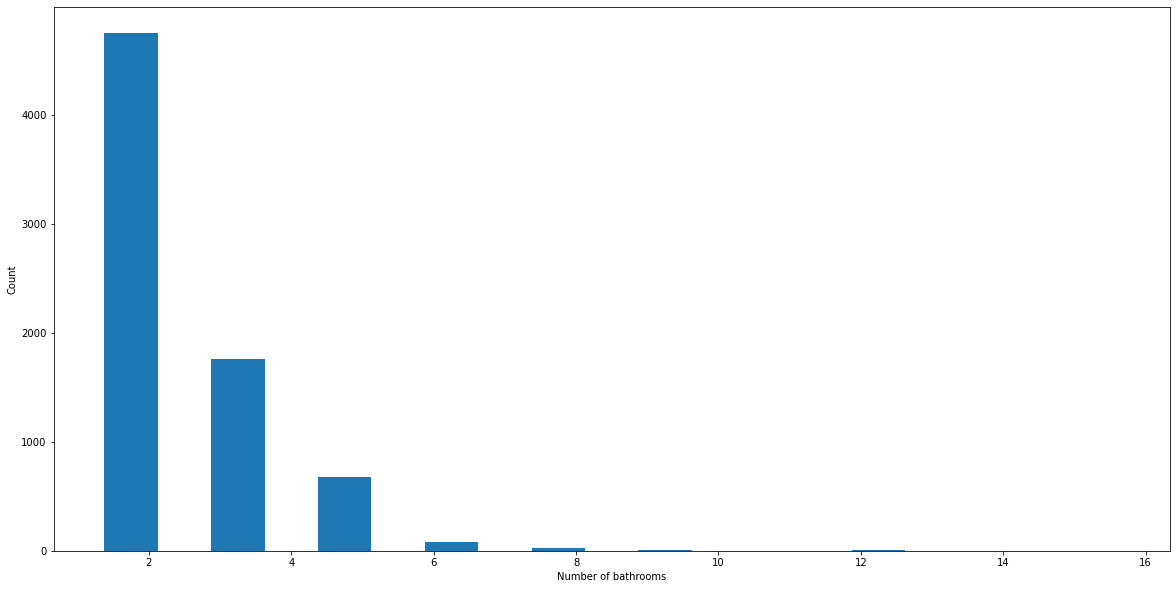

In [77]:
plt.hist(df8.bath,rwidth=0.5)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [78]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


##### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [79]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [80]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [81]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [82]:
df10 = df9.drop(['size','price_per_sqft'],axis=1)

In [83]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


#### One hot Encoding

In [84]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df11 = pd.concat([df10,dummies.drop('other',axis=1)],axis=1)

In [86]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df12 = df11.drop('location',axis=1)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df12.shape

(7239, 244)

In [89]:
y = df12.price

In [90]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [91]:
len(y)

7239

In [92]:
X = df12.drop('price',axis=1)

In [93]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X.shape

(7239, 243)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pickle
import json

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [97]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8629132245229449

In [98]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [99]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [100]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726745,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.714887,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [101]:
find_best_model_using_gridsearchcv(X_test,y_test)

,model,best_score,best_params
0,linear_regression,-8.679419e+16,{'normalize': False}
1,lasso,7.315368e-01,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,6.573020e-01,"{'criterion': 'mse', 'splitter': 'best'}"


In [103]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [108]:
predict_price('Electronic City',1000, 1, 2)

44.97836038100989

In [111]:
predict_price('1st Block Jayanagar',1000, 3, 3)

204.5987827460094

In [112]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [113]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))